# Lab 3.2 "Исследование актуальных трендов в Data Engineering"

Ниже предоставлены результаты и краткий анализ ответов 20 респондентов в опросе "№14 Интеграция данных из разнородных источников".

Больше файлов по данному заданию представлены в [Репозитории](https://github.com/GoshaMareev/DEP-MGPU/tree/main/Lab3/Lab%203_2).


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
sns.set_theme(style="darkgrid")

In [58]:
df = pd.read_excel(r"responses.xlsx",sheet_name="output_responses")
print(df)
print(df.info())

   Отметка времени  \
0       2025-03-14   
1       2025-03-30   
2       2025-03-22   
3       2025-03-24   
4       2025-03-12   
5       2025-03-23   
6       2025-03-18   
7       2025-03-09   
8       2025-03-30   
9       2025-03-27   
10      2025-03-15   
11      2025-03-29   
12      2025-03-20   
13      2025-03-19   
14      2025-03-30   
15      2025-03-08   
16      2025-03-03   
17      2025-03-08   
18      2025-03-22   
19      2025-03-15   

   1) С какими типами источников данных вы чаще всего сталкиваетесь при интеграции?  \
0                       NoSQL базы данных, API, Файлы                                 
1              Системы обмена сообщениями, API, Файлы                                 
2                              API, NoSQL базы данных                                 
3   Системы обмена сообщениями, NoSQL базы данных,...                                 
4   Файлы, NoSQL базы данных, Реляционные базы данных                                 
5          Реля

In [59]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [60]:
print(df.describe())

           Отметка времени  Реляционные базы данных:  NoSQL базы данных:  \
count                   20                 20.000000           20.000000   
mean   2025-03-18 21:36:00                  2.900000            2.500000   
min    2025-03-03 00:00:00                  1.000000            1.000000   
25%    2025-03-13 12:00:00                  2.000000            1.750000   
50%    2025-03-19 12:00:00                  3.000000            2.000000   
75%    2025-03-24 18:00:00                  4.000000            3.250000   
max    2025-03-30 00:00:00                  5.000000            5.000000   
std                    NaN                  1.333772            1.317893   

          Файлы:       API:  Системы обмена сообщениями:  \
count  20.000000  20.000000                    20.000000   
mean    3.450000   2.250000                     2.700000   
min     1.000000   1.000000                     1.000000   
25%     3.000000   1.000000                     1.000000   
50%     3.50000

In [61]:
#Частота типов и источников данных
source_columns = ['Реляционные базы данных:', 'NoSQL базы данных:', 'Файлы:', 'API:', 'Системы обмена сообщениями:']
source_counts = df[source_columns].sum()
print(source_counts)

Реляционные базы данных:       58
NoSQL базы данных:             50
Файлы:                         69
API:                           45
Системы обмена сообщениями:    54
dtype: int64


In [62]:
#Основные проблемы интеграции данных
integration_problems = df['3) Какие основные проблемы вы испытываете при интеграции данных из разнородных источников?'].str.split(',')
integration_problems_count = problem_counts = pd.Series([item.strip() for sublist in integration_problems for item in sublist]).value_counts()


In [63]:
#Использование ETL/ELT процессов
etl_elt_count = df['5) Используете ли вы ETL (Extract, Transform, Load) или ELT (Extract, Load, Transform) процессы для интеграции данных?'].value_counts()

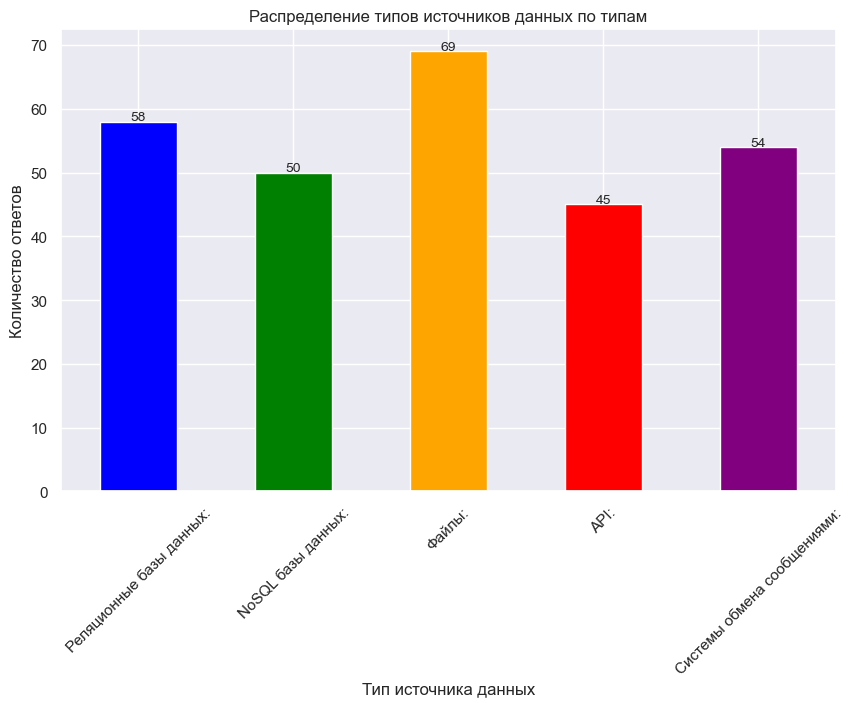

In [64]:
#Распределение источников данных по типам
plt.figure(figsize=(10, 6))
source_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red', 'purple'])
for i, value in enumerate(source_counts):
    plt.text(i, value + 0.2, str(value), ha='center', fontsize=10)
plt.title('Распределение типов источников данных по типам')
plt.xlabel('Тип источника данных')
plt.ylabel('Количество ответов')
plt.xticks(rotation=45)
plt.show()

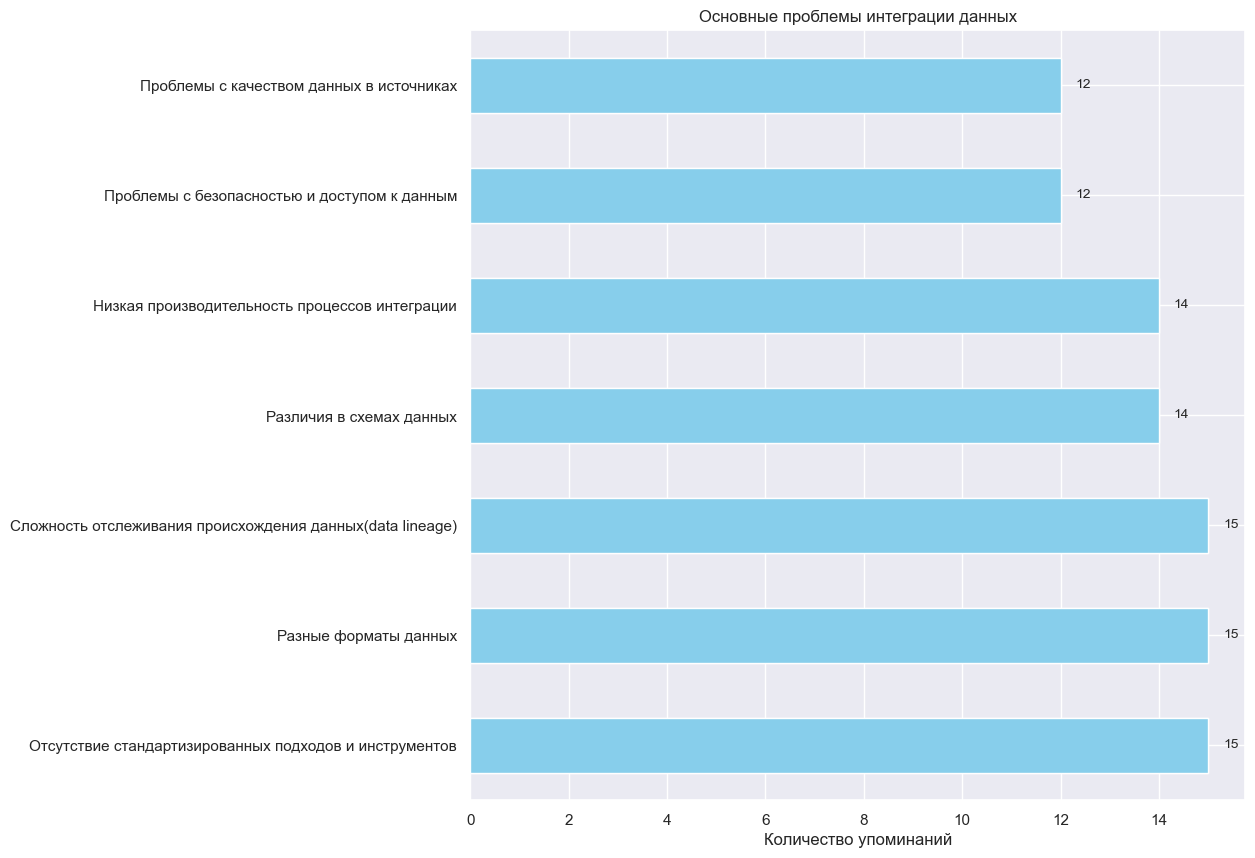

In [65]:
# Основные проблемы интеграции данных
plt.figure(figsize=(10, 10))
integration_problems_count.plot(kind='barh', color='skyblue')
bars = problem_counts.plot(kind='barh', color='skyblue')
for i, value in enumerate(problem_counts):
    bars.text(value + 0.3, i, str(value), va='center', fontsize=10)
plt.title('Основные проблемы интеграции данных')
plt.xlabel('Количество упоминаний')
plt.show()

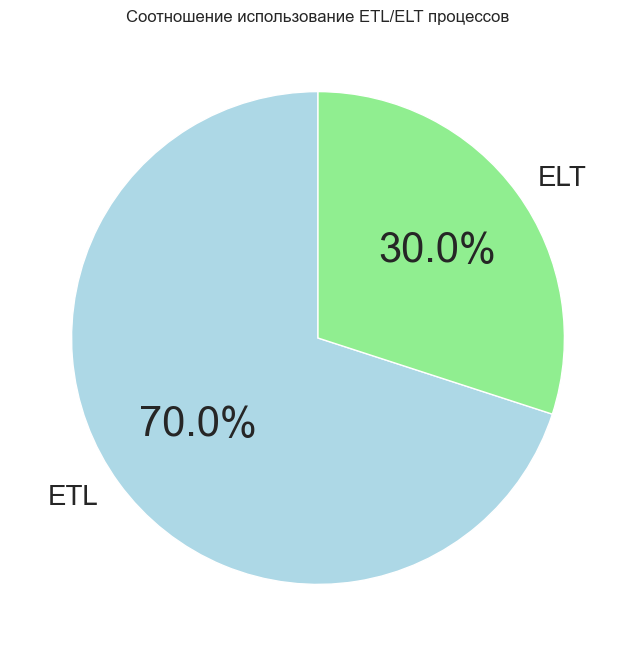

In [66]:
#Соотношение использование ETL/ELT процессов
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    etl_elt_count,
    labels=etl_elt_count.index,
    autopct='%1.1f%%',
    colors=['lightblue', 'lightgreen', 'pink'],
    startangle=90
)

# Улучшение стиля подписей
for text in texts:
    text.set_fontsize(20)
for autotext in autotexts:
    autotext.set_fontsize(30)
plt.title('Соотношение использование ETL/ELT процессов')
plt.ylabel('')
plt.show()

## Выводы:

1. Самыми популярными источниками данных оказались: файлы, рел. бд и системы обмена сообщениями, что может быть связано с их универсальностью, распространённостью, удобством; текущие тенденции источников

2. Основные проблемы интеграции данных: сложность отслеживания происхождения данных(data lineage), разные форматы данных, отсутсвие станд. подходов и инструментов - Трудности в отслеживании, как данные трансформируются и перемещаются между системами, дополнительные сложности при объединении файлов неоднородного формата, недостаток общепринятых стандартов (фрагментация решений и увеличение затрат на разработку). *Возможно*, стоит внедрить инструменты для автоматического отслеживания происхождения данных, использовать унифицированные форматы данных, разработать корпоративные стандарты

3. Соотношение использования ETL/ELT процессов 70/30 - ETL остается доминирующем подходом из-за широкой поддержки в существующих инструментах